In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import diff,solve
from itertools import count
import math

from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

In [29]:
def beta_L(A):
    eq1 = (-diff(g_L) + diff(g_b))
    eq2 = (-diff(g_b) + (g_b - g_L)/(x_b - x_L))
    sol = solve((eq1,eq2),[x_b,x_L])

    if 0 <= sol[0][0] <= 1:
        x_b_,x_L_ = sol[0][0],sol[0][1]
    else:
        x_b_,x_L_ = sol[1][0],sol[1][1]
    z_b_ = (X - x_L_)/(x_b_ - x_L_)
    z_L_ = 1 - z_b_
    return z_b_*g_b.subs(x_b, x_b_) + z_L_*g_L.subs(x_L, x_L_)

def alpha_L(A):
    eq1 = (-diff(g_L) + diff(g_a))
    eq2 = (-diff(g_a) + (g_a - g_L)/(x_a - x_L))
    sol = solve((eq1,eq2),[x_a,x_L])
    if 0 <= sol[0][0] <= 1:
        x_a_,x_L_ = sol[0][0],sol[0][1]
    else:
        x_a_,x_L_ = sol[1][0],sol[1][1]
    z_a_ = (X - x_L_)/(x_a_ - x_L_)
    z_L_ = 1 - z_a_
    return z_a_*g_a.subs(x_a, x_a_) + z_L_*g_L.subs(x_L, x_L_)

def alpha_beta(A):
    eq1 = (-diff(g_a) + diff(g_b))
    eq2 = (-diff(g_b) + (g_b - g_a + A*(1-2*(x_a-X)/(x_a-x_b)))/(x_b - x_a))
    sol = solve((eq1,eq2),[x_a,x_b])

    x_a_,x_b_ = sol[0][0],sol[0][1]
    z_a_ = (X - x_b_)/(x_a_ - x_b_)
    z_b_ = 1 - z_a_
    return z_a_*g_a.subs(x_a,x_a_) + z_b_*g_b.subs(x_b,x_b_) + A*z_a_*z_b_ 

#input the common tangent and 2 free energy functions
#returns the feasible boundaries    
def inter_tan_G(com_tan,g_1,g_2,x_1,x_2):
    eq1 = (com_tan - g_1.subs(x_1,X))
    sol_1 = solve((eq1),[X])
    eq2 = (com_tan - g_2.subs(x_2,X))
    sol_2 = solve((eq2),[X])
    return np.array([sy.re(sol_1[0]), sy.re(sol_2[0])])

#Create new common tangents that obey the feasible boundaries
# and are infinity elsewhere
def correct_tangent(com_tan,intersection_G):
    new_tangent = sy.Piecewise(
        (float('inf'),X <= min(intersection_G) -1e-8), #account for some error
        (float('inf'),X >= max(intersection_G)+1e-8),
        (com_tan,True))
    return new_tangent

#Find the boundaries which the common tangents intersect
def intersect_com_tans(com_tan_1,com_tan_2):
    eq1 = (com_tan_1 - com_tan_2)
    sol = np.array(solve((eq1),[X]))
    return sol[np.where((sol > 0)&(sol < 1))]

def check_phase(check_points,com_al,com_bl,com_ab):
    phases = np.array(['αL','βL','αβ','α','β','L'])
    exit = []
    G_L = sy.lambdify(x_L,g_L)
    G_a = sy.lambdify(x_a,g_a)
    G_b = sy.lambdify(x_b,g_b)
    al_tangent = sy.lambdify(X,com_al)
    bl_tangent = sy.lambdify(X,com_bl)
    ab_tangent = sy.lambdify(X,com_ab)
    for i,val in enumerate(check_points):
        L = G_L(val)
        a = G_a(val)
        b = G_b(val)
        al = al_tangent(val)
        bl = bl_tangent(val)
        ab = ab_tangent(val)
        check = np.array([al,bl,ab,a,b,L])
        index = np.argmin(check)
        exit.append(phases[index])
    return dict(zip(check_points,exit))
    
#Takes in phases i.e. np.array(['αL','βL','αβ','α','β','L']), and result from check_phase, returns where phase begins
def simplify_plot_points(phases,check_phase):
    vals = check_phase.values()
    keys = check_phase.keys()
    indexes = []
    for k in range(len(phases)):
        zipped = [i for i,j in zip(count(), plotting.values()) if j == phases[k]]
        if np.size(zipped) > 0:
            indexes.append(min(zipped))
    indexes = np.sort(indexes)
    return dict(zip(np.asarray(list(keys))[indexes],np.asarray(list(vals))[indexes]))

    phases = np.array(['αL','βL','αβ','α','β','L'])

    return {T:simplify_plot_points(phases,plotting)}

In [79]:
A = 1

X, x_a, x_b, x_L, z_a, z_b = sy.symbols('X, x_a, x_b, x_L, z_a, z_b')

x_a0,x_L0,x_b0 = .2,.5,.8
b_a,b_L,b_b = 10,12,10.5
a = 40

In [82]:
alpha_L(A)

3.33333333333333*X + 9.26388888888889

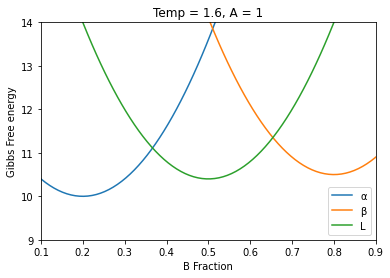

In [81]:
#FOR PLOTTING
# T = 1
T = 1.6
# T = 2
g_a_plot = lambda x_a: a*(x_a-x_a0)**2 + b_a
g_b_plot = lambda x_b: a*(x_b-x_b0)**2 + b_b
g_L_plot = lambda x_L: a*(x_L-x_L0)**2 + b_L - T
x_grid = np.linspace(0,1,100)
plt.plot(x_grid, g_a_plot(x_grid),label = 'α')
plt.plot(x_grid, g_b_plot(x_grid), label = 'β')
plt.plot(x_grid, g_L_plot(x_grid), label = 'L')
# plt.plot(x_grid, al_tangent(x_grid), label = 'αL')
# plt.plot(x_grid, ab_tangent(x_grid), label = 'αβ')
# plt.plot(x_grid, bl_tangent(x_grid), label = 'βL')
plt.title('Temp = ' + str(T) + ', A = ' + str(A))
plt.xlabel('B Fraction')
plt.ylabel('Gibbs Free energy')
plt.ylim(9,14)
plt.xlim(0.1,0.9)
plt.legend()
plt.savefig('1phase free_energy comtan, A=' + str(A))
plt.show()

In [77]:
# T_grid = np.sort(np.concatenate((np.linspace(1.75,1.85,5),np.linspace(1,2.5,10))))
# T_grid = np.linspace(1,2.5,10)
T_grid = [1]
phases = np.array(['αL','βL','αβ','α','β','L'])

g_a = a*(x_a-x_a0)**2 + b_a
g_b = a*(x_b-x_b0)**2 + b_b

# T = T_grid[0]

ends = np.array([0,1])

res_all = []
for i in range(len(T_grid)):
    T = T_grid[i]
    g_L = a*(x_L-x_L0)**2 + b_L - T


    bl_G = inter_tan_G(beta_L(A),g_b,g_L,x_b,x_L)
    al_G = inter_tan_G(alpha_L(A),g_a,g_L,x_a,x_L)
    ab_G = inter_tan_G(alpha_beta(A),g_a,g_b,x_a,x_b)
    com_bl = correct_tangent(beta_L(A),bl_G)
    com_al = correct_tangent(alpha_L(A),al_G)
    com_ab = correct_tangent(alpha_beta(A),ab_G)
    al_bl = intersect_com_tans(com_al,com_bl)
    al_ab = intersect_com_tans(com_al,com_ab)
    ab_bl = intersect_com_tans(com_ab,com_bl)

    grid_start = np.concatenate((al_G,bl_G,ab_G,al_bl,al_ab,ab_bl))

    #create full grid to look (1e-# is to account for the minor errors and equal values at a point)
    grid_x = np.sort(np.concatenate((grid_start,grid_start*(1-1e-6),grid_start*(1+1e-6),ends)))

    exit = []
    G_L = sy.lambdify(x_L,g_L)
    G_a = sy.lambdify(x_a,g_a)
    G_b = sy.lambdify(x_b,g_b)
    al_tangent = sy.lambdify(X,com_al)
    bl_tangent = sy.lambdify(X,com_bl)
    ab_tangent = sy.lambdify(X,com_ab)

    for i,val in enumerate(grid_x):
        L = G_L(val)
        a = G_a(val)
        b = G_b(val)
        al = al_tangent(val)
        bl = bl_tangent(val)
        ab = ab_tangent(val)
        check = np.array([al,bl,ab,a,b,L])
        index = np.argmin(check)
        exit.append(phases[index])
        
    # MARAT'S CODE STARTS HERE
    exit = np.array(exit)

    exit = exit[grid_x>=0]    
    grid_x = grid_x[grid_x>=0] ## NOT SURE IF WE CAN DO THIS SIMPLY LIKE THIS. 

    res = {}
    for ph in phases: 
        idx = exit == ph
        if idx.any():
            res[ph] = {'c':[np.min(grid_x[idx]),np.max(grid_x[idx])]}
    res_all.append(res)

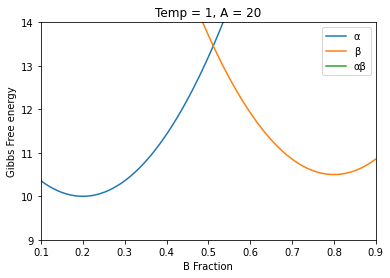

In [78]:
#FOR PLOTTING
# T = 1
T = T_grid[0]
# T = 2
g_a_plot = lambda x_a: a*(x_a-x_a0)**2 + b_a
g_b_plot = lambda x_b: a*(x_b-x_b0)**2 + b_b
g_L_plot = lambda x_L: a*(x_L-x_L0)**2 + b_L - T
x_grid = np.linspace(0,1,100)
plt.plot(x_grid, g_a_plot(x_grid),label = 'α')
plt.plot(x_grid, g_b_plot(x_grid), label = 'β')
# plt.plot(x_grid, g_L_plot(x_grid), label = 'L')
# plt.plot(x_grid, al_tangent(x_grid), label = 'αL')
plt.plot(x_grid, ab_tangent(x_grid), label = 'αβ')
# plt.plot(x_grid, bl_tangent(x_grid), label = 'βL')
plt.title('Temp = ' + str(T) + ', A = ' + str(A))
plt.xlabel('B Fraction')
plt.ylabel('Gibbs Free energy')
plt.ylim(9,14)
plt.xlim(0.1,0.9)
plt.legend()
plt.savefig('1phase free_energy comtan, A=' + str(A))
plt.show()

In [45]:
# GROUPING POINTS BY PHASE FIELD
pd = {}
patches = []
for ph in phases: 
    pd[ph] = []
    for ii,res in enumerate(res_all): 
        if ph in res.keys():
            pd[ph].append([res[ph]['c'][0],T_grid[ii]])
            pd[ph].append([res[ph]['c'][1],T_grid[ii]])
    

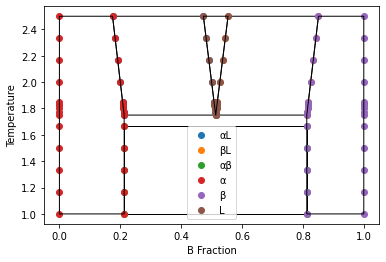

In [46]:
import math
import matplotlib.patches as patches
import pylab

for ph in phases: 
    pp = pd[ph]
    cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
    # sort by polar angle
    pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
    # plot points
    pylab.scatter([p[0] for p in pp],[p[1] for p in pp],label = str(ph))
    # plot polyline
    pylab.gca().add_patch(patches.Polygon(pp,closed=True,fill=False)) 

plt.xlabel('B Fraction')
plt.ylabel('Temperature')
plt.legend()
# plt.savefig('No_stress')
plt.show()